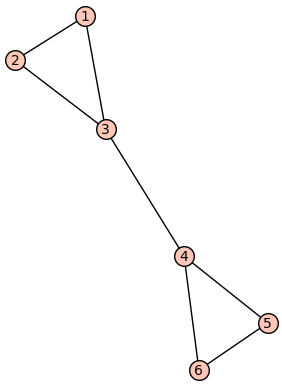

Found a vertex cover: {1, 2, 4, 5}


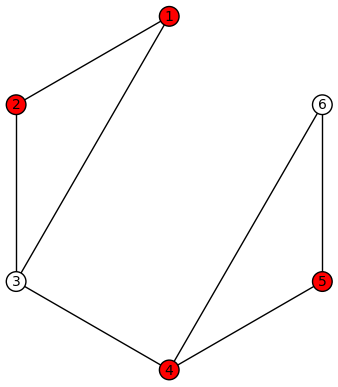

{1, 2, 4, 5}

In [6]:
# the function takes in three parameters
# G: the input graph
# k: remaining budget
# cover: default as empty but will change if there is a provided non-empty set
def vertex_cover_recursive(G, k, cover=set()):
    # see if there is any edge that is not covered
    uncovered_edges = [e for e in G.edges(labels=False) if not (e[0] in cover or e[1] in cover)]
    if not uncovered_edges:
        return cover  # return current vertex cover
    if k <= 0:
        return None  # run out of budget but there still are edges left
    # select an edge from E
    u, v = uncovered_edges[0]
    # add u into vertex cover and go on
    cover_with_u = vertex_cover_recursive(G, k - 1, cover.union({u}))
    if cover_with_u is not None:
        return cover_with_u
    # add v into vertex cover and go on
    cover_with_v = vertex_cover_recursive(G, k - 1, cover.union({v}))
    if cover_with_v is not None:
        return cover_with_v
    # return no if u and v are both not valid vertex
    return None

def vertex_cover(G, k):
    # starting with empty vertex cover
    cover = vertex_cover_recursive(G, k)
    if cover is not None:
        print("Found a vertex cover:", cover)
        # mark the vertices in VC in red and other vertices in white
        vertex_colors = {'red': list(cover), 'white': [v for v in G.vertices() if v not in cover]}
        # plot the resulting graph
        G.show(vertex_colors=vertex_colors, layout='circular')
        return cover
    else:
        print("No vertex cover found with", k, "vertices")
        return None

# create a graph
# G = graphs.PetersenGraph()
G = Graph([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 6), (6, 4)])
show(G, layout='circular')
# try the algorithm with created G and k=4
vertex_cover(G, 4)